# Homework#5 Morphological Processing & Object Detection
### 01205481 Digital Image Processing, 2nd Semester, 2022-2023
#### การบ้านลําดับที่ 5 ในวิชา 01205481 Digital Image Processing มีวัตถุประสงค์ให้นิสิตได้ศึกษาทดลองการทํา Morphological Image Processing และ Object Detection เพื่อให้เกิดความเข้าใจกระบวนการพื้นฐาน โดยให้นิสิตทําการบ้าน ตามขั้นตอนที่กําหนดให้ซึ่งมีรายละเอียดดังต่อไปนี้

#### รายละเอียดการบ้านครั้งที่ 5 Morphological Processing & Object Detection

In [1]:
# All
import cv2
import matplotlib.pyplot as plt
import numpy as np

import skimage.morphology as skmorph
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line
from skimage.transform import hough_circle, hough_circle_peaks

In [2]:
def readImagefromFile(filename):
    img = cv2.imread(str(filename))
    print(f"Shape in put image is {img.shape}")
    img_out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"Shape out put image RGB is {img_out.shape}")
    return img_out
def ImageSubplot(img_in,img_name,Title):
    fig, axs = plt.subplots(2, len(img_in), figsize=(30, 12))
    fig.suptitle(Title, fontsize=30)
    for i in range(len(img_in)):
        axs[0,i].imshow(img_in[i], cmap="gray")
        axs[0,i].set_xlabel(img_name[i], fontsize=15)
        axs[1,i].hist(img_in[i].flatten(),bins=256)
        axs[1,i].set_xlabel('Hist image '+ str(img_name[i]), fontsize=15)
    plt.show()

## 1. การเตรียมภาพสําหรับการทดลอง
### ให้ทําการเตรียมภาพ Binary Image ที่ได้จากการ Segmentation วิธีใดวิธีหนึ่งจํานวน 1 ภาพ และภาพ Grayscale ของภาพต้นฉบับ 1 ภาพ

In [3]:
IMG_Grayscale = readImagefromFile("P3.3 Stew Detection and Fish Density Classification#3/40 (2).JPG")
IMG_Grayscale = cv2.cvtColor(IMG_Grayscale, cv2.COLOR_RGB2GRAY)

Shape in put image is (3078, 5472, 3)
Shape out put image RGB is (3078, 5472, 3)


In [4]:
IMG_Binary = readImagefromFile("Segmentation_kmean.JPG")

Shape in put image is (3078, 5472, 3)
Shape out put image RGB is (3078, 5472, 3)


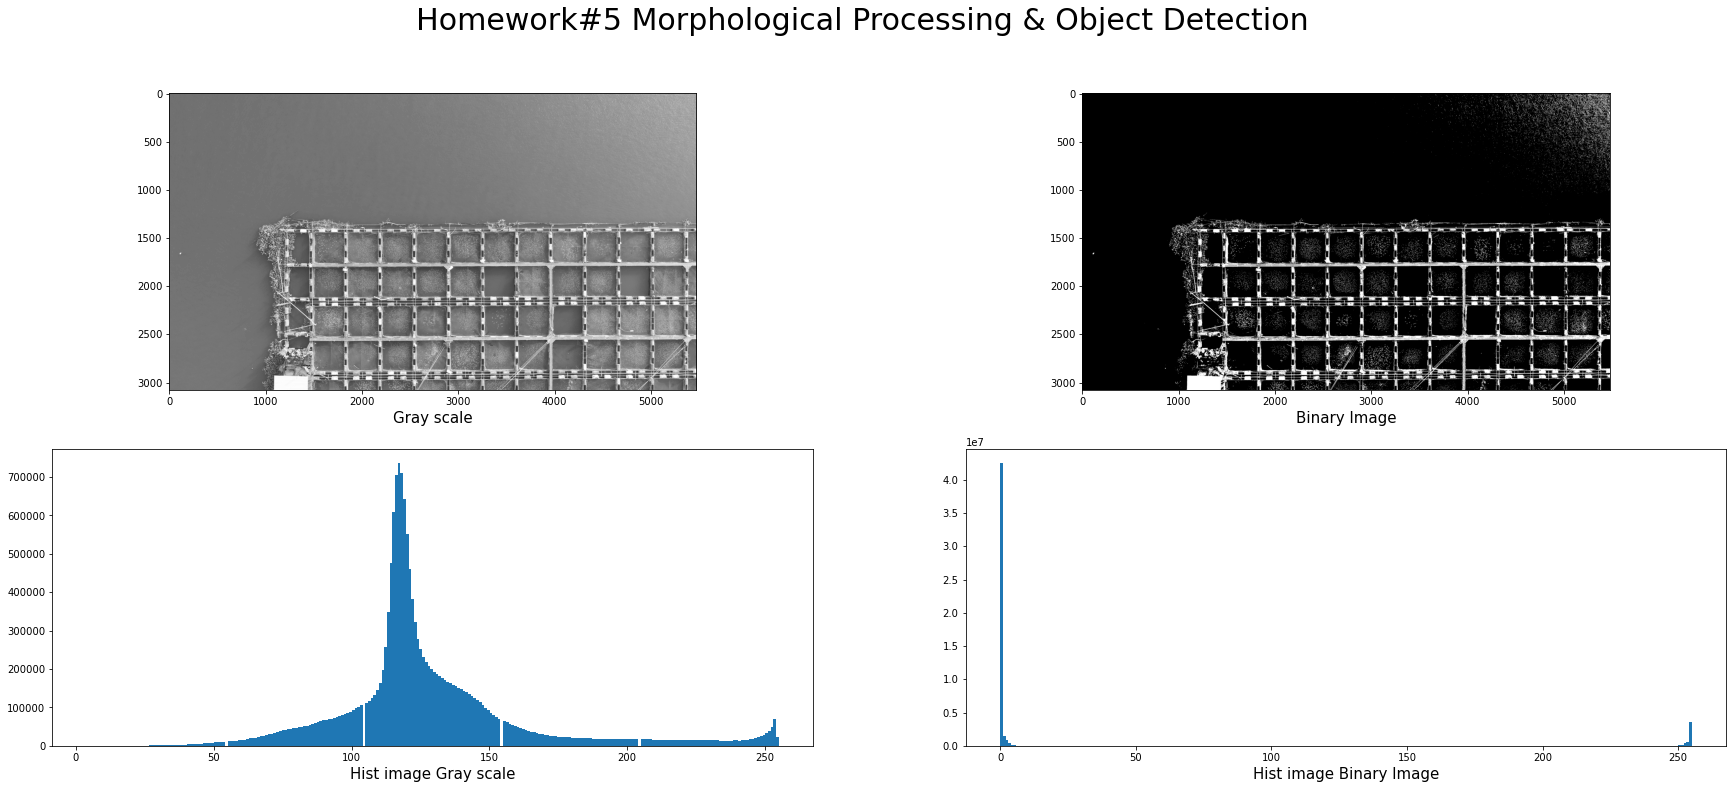

In [5]:
ImageSubplot(img_in =[IMG_Grayscale,IMG_Binary],img_name = ["Gray scale","Binary Image"],Title = "Homework#5 Morphological Processing & Object Detection")

## 2. การทดลอง Morphological Image Processing นำภาพ Binary Image ที่เตรียมในข้อ 1 มาใช้ในการทดลองดังต่อไปนี้

### 2.1 ทดลองใช้ Morphological Opening โดยเลือกใช้ขนาดและรูปร่าง Structuring Element ตามความเหมาะสม แสดงภาพก่อนและหลังการประมวลผล พร้อมแสดงหรือแนบโปรแกรม Python ที่ใช้

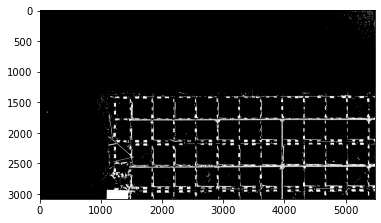

In [6]:
stre = skmorph.square(5)
Open_IMG_Binary  = cv2.morphologyEx(IMG_Binary , cv2.MORPH_OPEN, stre)
plt.imshow(Open_IMG_Binary)

### 2.2 ทดลองใช้ Morphological Closing โดยเลือกใช้ขนาดและรูปร่าง Structuring Element ตามความเหมาะสม แสดงภาพก่อนและหลังการประมวลผล พร้อมแสดงหรือแนบโปรแกรม Python ที่ใช้

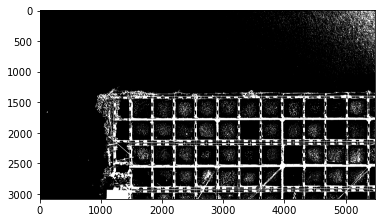

In [7]:
Close_IMG_Binary = cv2.morphologyEx(IMG_Binary , cv2.MORPH_CLOSE, stre)
plt.imshow(Close_IMG_Binary)

### 2.3 วิเคราะห์ผลลัพธ์ที่ได้จากการทำ Opening และ Closing ว่ามีประโยชน์อย่างไร

จะเห็นว่ารูปร่างของ Structuring Element จะมีผลกับรูปภาพถ้า Structuring Element มีขนาดใหญ่ในในการทำ Opening ภาพจะถูก remove Fragments ออกทำให้ส่วนของแสงที่สะท้อนทำและปลาหายไป ในส่วนการทำ Closing ในส่วนที่เป็นช่องว่างจะถูกเติมให้เต็มเป็นการ Fill Holes

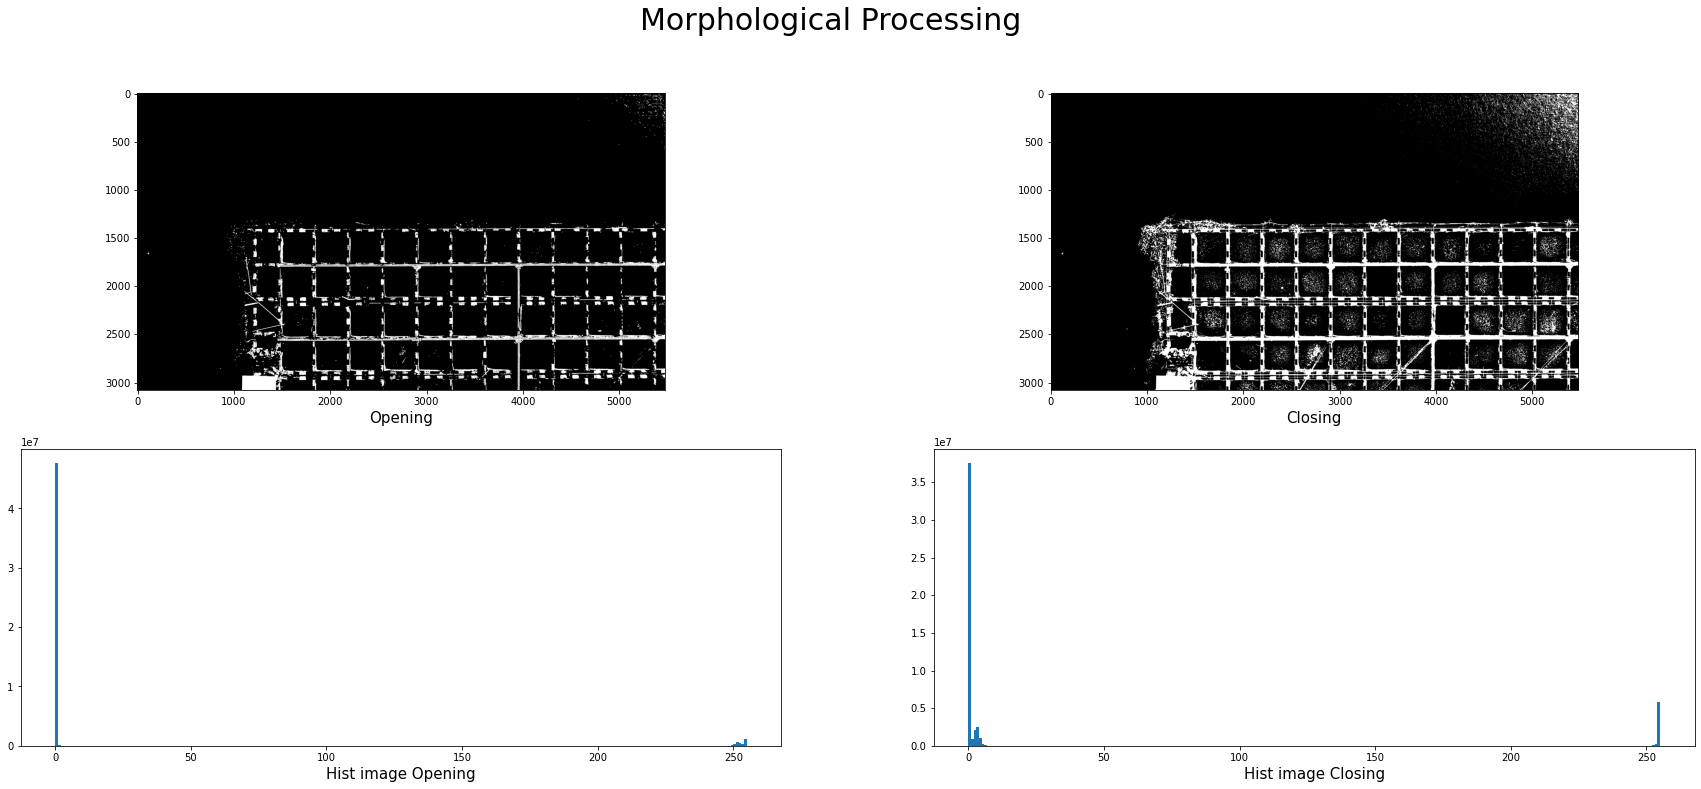

In [8]:
ImageSubplot(img_in =[Open_IMG_Binary,Close_IMG_Binary],img_name = ["Opening","Closing"],Title = "Morphological Processing")

## 3. การทดลอง Object Detection โดย Connected Components นำภาพ Binary Image ที่เตรียมในข้อ 1 หรือภาพ Binary Image ที่ผ่าน Morphological Image Processing จากข้อ 2 ดำเนินการเขียนโปรแกรมตามขั้นตอนดังต่อไปนี้

### 3.1 หา connected components โดยใช้ฟังก์ชัน “cv2.connectedComponents(…)” กำหนดให้ connectivity เป็นประเภท 8 ทิศทาง

(3078, 5472, 3)
(3078, 5472)


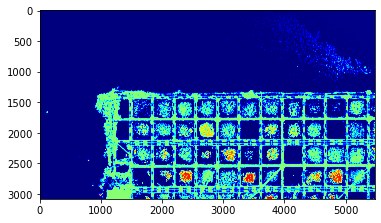

In [9]:
### => Morphological Connected Components
print(IMG_Binary.shape)
IMG_Binary_2D = cv2.cvtColor(Close_IMG_Binary, cv2.COLOR_RGB2GRAY)
print(IMG_Binary_2D.shape)
_,label_img = cv2.connectedComponents(IMG_Binary_2D, connectivity = 8)
plt.imshow(label_img,cmap = "jet")

### 3.2 กำหนดเงื่อนไขเพื่อเลือกกลุ่ม connected components ที่ต้องการ

In [10]:
def CCselectLoop(label_img):
    # -> Define Minimum Object Size
    min_size = int((label_img.shape[0]*label_img.shape[1])*0.1) # 10 %
    # -> Count Number of pixel of each label
    labels, counts = np.unique(label_img,return_counts=True)
    output_img = label_img.copy()
    
    # -> Loop check group/label size
    for y in range(label_img.shape[0]):
        for x in range(label_img.shape[1]):
            if counts[label_img[y, x]] >= min_size and label_img[y, x] != 0:
                output_img[y, x] = 1
            else:
                output_img[y, x] = 0
    return output_img

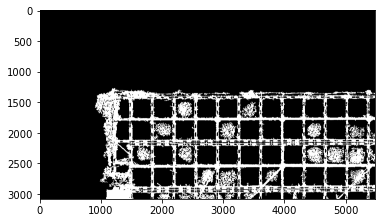

In [11]:
# - Select Labels
output_img = CCselectLoop(label_img)
plt.imshow(output_img,cmap = "gray")

### แสดงผลลัพธ์ที่ได้ และแสดงหรือแนบโปรแกรม Python ที่เขียนและใช้งาน

## 4. การทดลอง Object Detection โดย Correlation นำภาพ Binary Image ที่เตรียมในข้อ 1 หรือภาพ Binary Image ที่ผ่าน Morphological Image Processing จากข้อ 2 ดำเนินการเขียนโปรแกรมตามขั้นตอนดังต่อไปนี้

### 4.1 กำหนดขนาดและรูปร่าง (Filter) ที่ต้องการนำไปเปรียบเทียบกับภาพ Binary Image

In [12]:
### => Filter
filter = np.array([[-1,-2,-1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

### 4.2 ดำเนินการ Filtering 2D ด้วย “cv2.filter2D(…)” โดยใช้ Filter ขนาดและรูปร่างตามที่ออกแบบใน 4.1

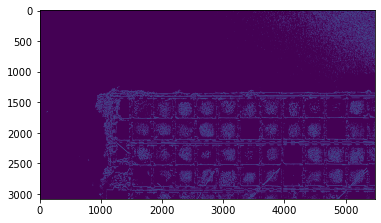

In [13]:
### Correlation
res_img = cv2.filter2D(IMG_Binary_2D, -1, filter)
plt.imshow(res_img)

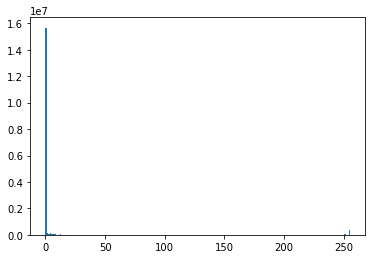

In [14]:
plt.hist(res_img.flatten(),bins=256)
plt.show()

### 4.3 ดำเนินการ thresholding เพื่อเลือกเฉพาะบริเวณที่มีค่า Correlation สูง

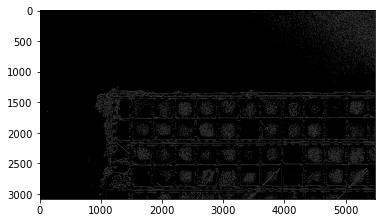

In [15]:
### -> Thresholding Correlation
max_ratio = 0.5
output_img = np.where(res_img > res_img.max()*max_ratio,1, 0)

plt.imshow(output_img,cmap = "gray")

#### แสดงผลลัพธ์ที่ได้ และแสดงหรือแนบโปรแกรม Python ที่เขียนและใช้งาน

## 5. การทดลอง Object Detection โดย Hough Transform นำภาพ Binary Image ที่เตรียมในข้อ 1 หรือภาพ Binary Image ที่ผ่าน Morphological Image Processing จากข้อ 2 หรือภาพ Grayscale Image ต้นฉบับ ดำเนินการหาขอบ ด้วยฟังก์ชัน “skimage.feature.canny(…)” โดยกำหนดพารามิเตอร์ตามความเหมาะสม และนำภาพขอบมาทดลองดังต่อไปนี้

### 5.1 ทดลองใช้ Hough Transform เส้นตรง ด้วยฟังก์ชัน “skimage.transform.probabilistic_hough_line(…)” โดยกำหนดพารามิเตอร์ตามความเหมาะสม แสดงผลลัพธ์ที่ได้ และแสดงหรือแนบโปรแกรม Python ที่เขียนและใช้งาน

In [16]:
def cannyEdge(input_img, low_thresh, high_thresh):
    ### -> Gaussian Blur Parameter
    blur_size = 5
    blur_sigma = 0.3*((blur_size-1)*0.5 - 1) + 0.8

    ### => Canny Edge Detection
    output_img = canny(input_img, 
                       blur_sigma,
                       low_threshold = low_thresh, 
                       high_threshold = high_thresh,
                       use_quantiles = True,
                       mode='constant'
                       )
    return output_img

In [17]:
def cannyEdgeCV2(input_img, low_thresh, high_thresh):
    output_img = cv2.Canny(input_img,low_thresh, high_thresh)
    return output_img

In [18]:
def houghLine(input_img, low_thresh, high_thresh):
    # -> Edge Image
    #edge_img = cannyEdge(input_img, low_thresh, high_thresh)
    edge_img = cannyEdgeCV2(input_img, low_thresh, high_thresh)
    
    ### -> Hough Line Transformation
    hough_res = probabilistic_hough_line(edge_img, threshold=20,line_length=10, line_gap=1)
    
    # ~> Hough Visualization
    output_img = cv2.cvtColor(input_img, cv2.COLOR_GRAY2RGB)
    for i in range(len(hough_res)):
        p0, p1 = hough_res[i]
        cv2.line(output_img, p0, p1, (0,0,255), 1)
    return output_img, hough_res

In [19]:
IMG_houghLine,hough_res =  houghLine(IMG_Binary_2D, low_thresh =0.9, high_thresh =0.9)

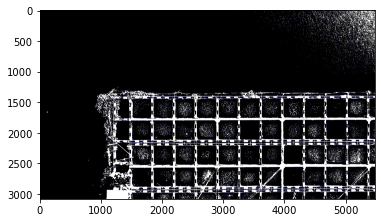

In [20]:
plt.imshow(IMG_houghLine)

### 5.2 ทดลองใช้ Hough Transform วงกลม ด้วยฟังก์ชัน “skimage.transform.hough_circle (…)” และคัดกรองวงกลมที่หาได้ ด้วยฟังก์ชัน “skimage.transform.hough_circle_peaks(…)” โดยกำหนดพารามิเตอร์ตามความเหมาะสม แสดงผลลัพธ์ที่ได้ และแสดงหรือแนบโปรแกรม Python ที่เขียนและใช้งาน

In [21]:
def houghCircle(input_img, low_thresh, high_thresh):
    # -> Edge Image
    #edge_img = cannyEdge(input_img, low_thresh, high_thresh)
    edge_img = cannyEdgeCV2(input_img, low_thresh, high_thresh)
    
    ### -> Hough Circle Transformation
    hough_radius = np.arange(20, 30)
    hough_res = hough_circle(edge_img, hough_radius)
    votes, center_x, center_y, radius = hough_circle_peaks(hough_res, 
                                                           hough_radius,
                                                           min_xdistance=20, 
                                                           min_ydistance=20)
    # ~> Hough Visualization
    output_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2RGB)
    
    for v, cx, cy, r in zip(votes, center_x, center_y, radius):
        if v >= 0.20:
            cv2.circle(output_img, (cx, cy), r, (0,0,255), 1)

    return output_img, [votes, center_x, center_y, radius]

In [22]:
IMG_Hough_Circle,hough_Circuit =  houghCircle(IMG_Binary_2D, low_thresh =0.9, high_thresh =0.9)

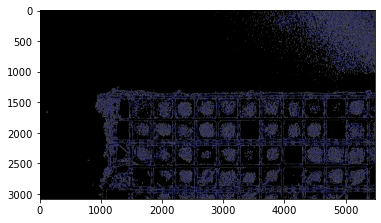

In [23]:
plt.imshow(IMG_Hough_Circle)

## 6. วิเคราะห์ผลการทดลอง Object Detection จากข้อ 3, 4 และ 5 ว่าสามารถระบุตำแหน่งของวัตถุตามที่ต้องการได้หรือไม่ อย่างไร

#### การทดลอง Object Detection โดย Connected Components ในข้อที่ 3 เป็นการแยกหลายๆ object ออกจากกัน สามารถระบุตำแหน่งของตัวปลากับกระชั่งได้
#### การทดลอง Object Detection โดย Correlation ในช้อที่ 4 เป็นการสร้าง filter รูปที่เราต้องการโดยจะมีข้อเสียตรงมี่เราจะต้องสร้าง filter ที่มีขนาดและรูปทรงเท่ากับสิ่งที่เราต้องการ Detection ซึ้งในข้อที่เป็นการทำ filter ที่ไม่ได้มีขนาดเท่ารูปจริง
#### การทดลอง Object Detection โดย Hough Transform  ในข้อที่ 5 วิธี   Hough Transform เส้นตรง จะได้ในส่วนกะชั่งที่มีเส้นตรงแต่ยังแยกไม่ดีเท่าที่ควร และ  Hough Transform วงกลม สามารถแยกในส่วนของปลา และ กระชังได้
#### จากการทดลองสรุปว่า Object Detection โดย Connected Components จะสามารถแยกได้ดีกว่าวิธีอื่นๆ